# Data Science Study - Iris Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Extraction

In [2]:
import pandas as pd
import numpy as np

irisDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                          names=['sepal length','sepal width','petal length','petal width','class'])

## 2. Data Exploration

In [71]:
irisDataset.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
irisDataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
print(irisDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


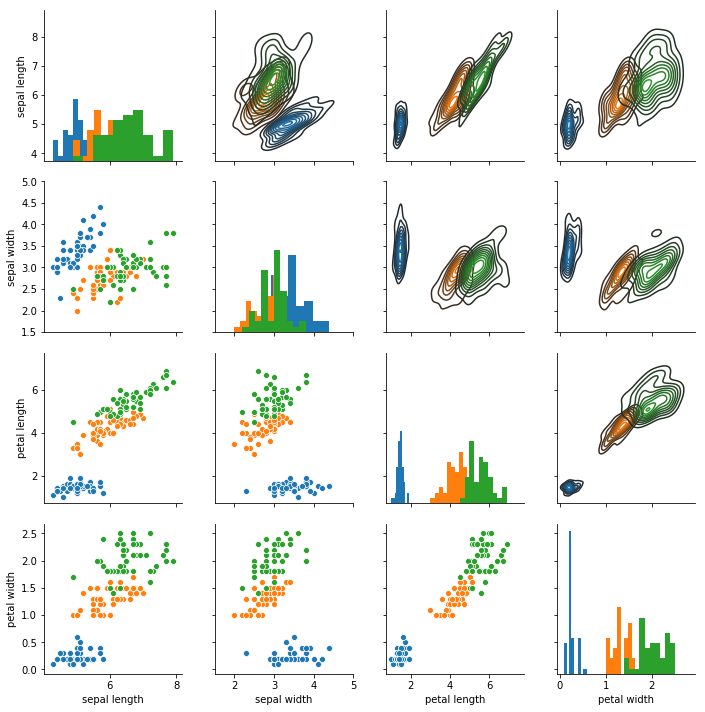

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

pg = sns.PairGrid(irisDataset, hue='class')
pg.map_lower(sns.scatterplot)
pg.map_diag(plt.hist)
pg.map_upper(sns.kdeplot)
plt.show()

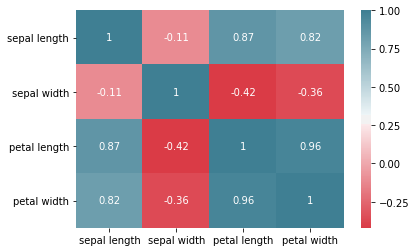

In [75]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(irisDataset.corr(), annot=True, cmap=cmap)
plt.show()

## 3. Data Preparation

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

random_state=26
ss = StandardScaler().fit(irisDataset.iloc[:,:-1])

x = irisDataset.iloc[:,:-1]
y = irisDataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state=22)

In [82]:
from sklearn.feature_selection import SelectKBest, chi2

best= SelectKBest(chi2,k=4).fit(x,y)
pd.DataFrame(data={ 'variables' : x.columns, 'score' : kbest.scores_, 'p-value' : kbest.pvalues_ }).sort_values(by='score', ascending=False)

,variables,score,p-value
2,petal length,116.169847,5.943444e-26
3,petal width,67.244828,2.500180e-15
0,sepal length,10.817821,4.476515e-03
1,sepal width,3.594499,1.657542e-01


## 4. Model Creation & Evaluation
### 4.1 Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lrPredict = lr.predict(X_test)

lrcv = LogisticRegressionCV(cv=3)
lrcv.fit(x, y)
lrcvPredict = lrcv.predict(x)
lrcvScore = lrcv.score(x,y)

print("Logistic Regression:", accuracy_score(lrPredict, y_test))
print( confusion_matrix(lrPredict, y_test))
print("Logistic Regression CV:", lrcvScore)
print( confusion_matrix(lrcvPredict, y))

Logistic Regression: 0.9736842105263158
[[11  0  0]
 [ 0 13  1]
 [ 0  0 13]]
Logistic Regression CV: 0.9666666666666667
[[50  0  0]
 [ 0 47  2]
 [ 0  3 48]]


### 4.2 Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
et = ExtraTreesClassifier(random_state=random_state)

print("Decision Tree: ", cross_validate(dt, x, y, cv=5)['test_score'])
print("RandomForest: ", cross_val_score(rf, x, y, cv=5))
print("ExtraTreesClassifier: ", cross_val_score(et, x, y, cv=5) )

Decision Tree:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
RandomForest:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
ExtraTreesClassifier:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]


### 4.3 KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

gs = GridSearchCV(KNeighborsClassifier(),param_grid={ 'n_neighbors' : [3,4,5] },cv=5)
gs.fit(x,y)
knn = gs.best_estimator_
knnPredict = knn.predict(x)
print("KNN: ", accuracy_score(knnPredict,y), "\nBest Params: ", knn.get_params())

KNN:  0.96 
Best Params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}


### 4.4 Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

print("Gaussian: ", cross_val_score(GaussianNB(),x,y,cv=5))

Gaussian:  [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


### 4.5 SVM

In [87]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

params = { 'svc__C': [1.0, 1.1, 1.2] }
pipe = Pipeline([('normalize', StandardScaler()) ,('pca', PCA() ), ('svc', SVC())])
svcGs = GridSearchCV(estimator=pipe, param_grid=params,cv=3)
svcGs.fit(x,y)
pd.DataFrame(svcGs.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005212,0.007371,0.000000,0.000000,1,{'svc__C': 1.0},0.980392,0.901961,0.979167,0.953333,0.036876,3,0.959596,0.989899,0.960784,0.970093,0.014013
1,0.000000,0.000000,0.005208,0.007366,1.1,{'svc__C': 1.1},0.980392,0.921569,1.000000,0.966667,0.033333,1,0.959596,0.989899,0.960784,0.970093,0.014013
2,0.000000,0.000000,0.000000,0.000000,1.2,{'svc__C': 1.2},0.980392,0.921569,1.000000,0.966667,0.033333,1,0.959596,0.989899,0.970588,0.973361,0.012526


### 4.6 Neural Network

In [88]:
from sklearn.neural_network import MLPClassifier

params = {}
pipe = Pipeline([ ("neural", MLPClassifier()) ])
gsMLP = GridSearchCV(estimator=pipe, param_grid=params, cv=3)
gsMLP.fit(x,y)
pd.DataFrame(gsMLP.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.109303,0.009383,0.0,0.0,{},1.0,0.921569,0.979167,0.966667,0.033456,1,0.959596,0.989899,0.980392,0.976629,0.012654


### 4.7 Deep Learning

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder().fit(y)

model = Sequential()
model.add(Dense(10, input_dim = 4 , activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train, to_categorical(lb.transform(y_train.values)), epochs=110)
model.evaluate(X_test, to_categorical(lb.transform(y_test.values)))

Epoch 1/110
112/112 [==============================] - 0s 3ms/step - loss: 1.5503 - acc: 0.3304
Epoch 2/110
112/112 [==============================] - 0s 0us/step - loss: 1.4637 - acc: 0.3304
Epoch 3/110
112/112 [==============================] - 0s 140us/step - loss: 1.3806 - acc: 0.3304
Epoch 4/110
112/112 [==============================] - 0s 0us/step - loss: 1.3227 - acc: 0.3304
Epoch 5/110
112/112 [==============================] - 0s 0us/step - loss: 1.2673 - acc: 0.5179
Epoch 6/110
112/112 [==============================] - 0s 140us/step - loss: 1.2159 - acc: 0.6786
Epoch 7/110
112/112 [==============================] - 0s 0us/step - loss: 1.1776 - acc: 0.6786
Epoch 8/110
112/112 [==============================] - 0s 139us/step - loss: 1.1397 - acc: 0.6696
Epoch 9/110
112/112 [==============================] - 0s 0us/step - loss: 1.1096 - acc: 0.6696
Epoch 10/110
112/112 [==============================] - 0s 0us/step - loss: 1.0795 - acc: 0.6696
Epoch 11/110
112/112 [===========

[0.33480554975961385, 1.0]